### Visualization and Munging StockData of Microsoft

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm #for normal distribution

In [2]:
ms = pd.read_csv('C:\\Users\\Computer Care\\Downloads\\Files\\microsoft.csv', index_col = 0)

In [3]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


#### 1. Attributes of DataFrame

In [4]:
ms.shape 

(780, 6)

#### 2. Summary Statistics

In [5]:
ms.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08


#### 3. StockData Ploting

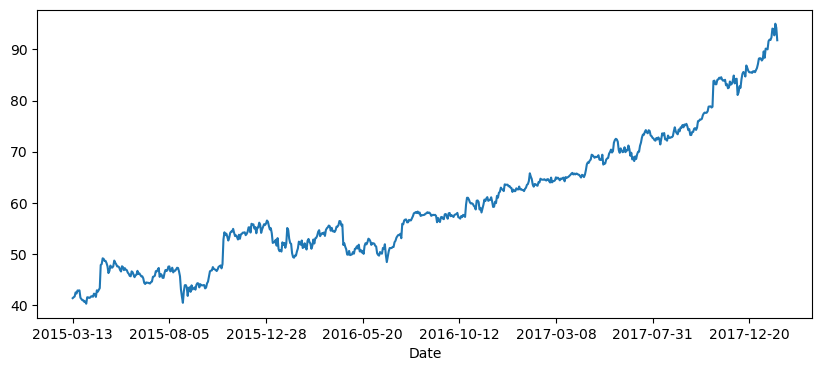

In [48]:
plt.figure(figsize=(10, 4))
ms.Close.plot()                                            #plot for closing price of microsoft
plt.show()
#daily close price shows the upward trend and we may guess that avg of daily return is positive check daily return directly

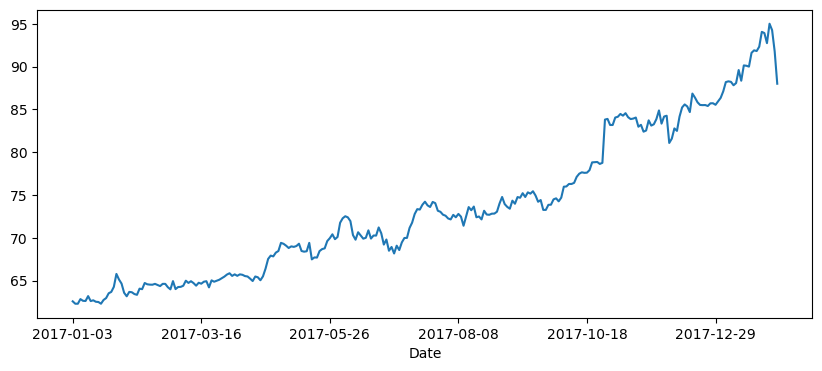

In [7]:
plt.figure(figsize = (10,4))
ms.loc['2017-01-01':,'Close'].plot() #plot for 2017 closing price
plt.show()

#### 4.Adding Column

In [8]:
#The close price of tomorrow
ms['TomorrowCP'] = ms.Close.shift(-1) 

#Price change between tomorrow and today
ms['PriceDiff'] = ms.TomorrowCP - ms.Close
ms['DailyReturn'] = ms.PriceDiff / ms.Close

#Directions show the pricediff > 0 Up(1) or priceddiff<=0 Down (-1) computed by list comprehension
ms['Direction'] = [1 if ms.loc[i, 'PriceDiff']> 0 else -1
                        for i in ms.index]
ms.head()

,Open,High,Low,Close,Adj Close,Volume,TomorrowCP,PriceDiff,DailyReturn,Direction
Date,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,46.759998,0.309997,0.006674,1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.330002,-0.429996,-0.009196,-1
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,45.650002,-0.680000,-0.014677,-1
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.230000,0.579998,0.012705,1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,47.590000,1.360000,0.029418,1


### Trading Strategy

##### 1. Munging the stock data - MA10 and MA50

In [9]:
#moving average over 10 and 50 days, moving avg smooth out noise to find the trend
ms['MA10'] = ms.Close.rolling(10).mean()
ms['MA50'] = ms.Close.rolling(50).mean()
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,TomorrowCP,PriceDiff,DailyReturn,Direction,MA10,MA50
Date,,,,,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,41.560001,0.180000,0.004350,1,42.495,44.0034
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,41.700001,0.140000,0.003369,1,42.263,43.9056
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.500000,0.799999,0.019185,1,42.105,43.8044
2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.290001,-0.209999,-0.004941,-1,42.049,43.7278
2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,42.880001,0.590000,0.013951,1,41.967,43.6606


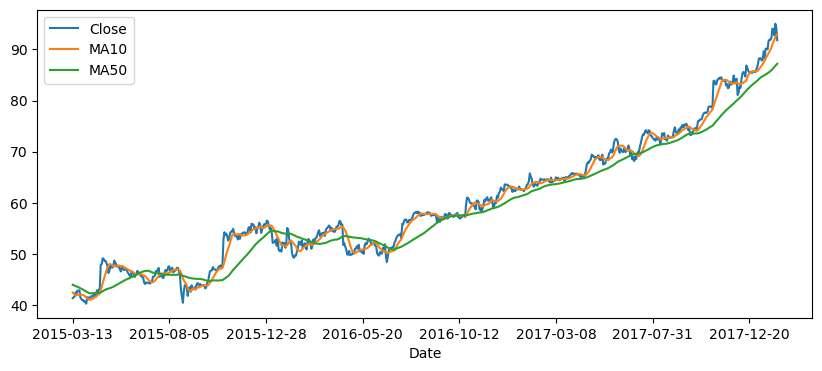

In [10]:
#Compare moving avg with close price
plt.figure(figsize = (10,4))

ms.Close.plot()
ms.MA10.plot()
ms.MA50.plot()

plt.legend()
plt.show()

##### 1. Add Shares to make decisions base on the strateg

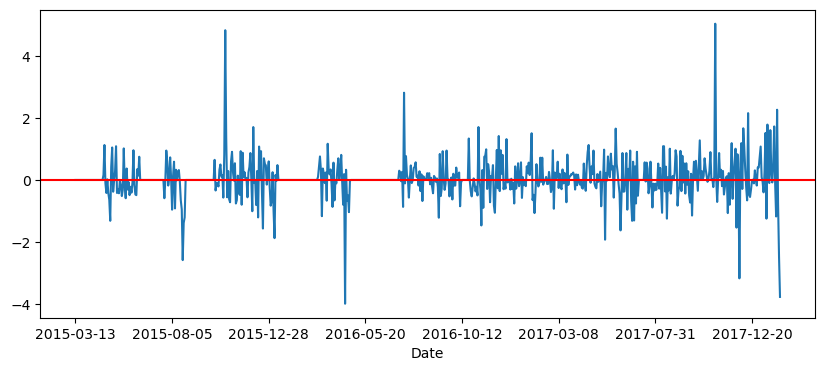

In [43]:
 # if MA10>MA50, denote as 1 (hold/buy one share of stock), otherwise do nothing
ms['Shares'] = [1 if ms.loc[i, 'MA10'] > ms.loc[i, 'MA50'] else 0
                   for i in ms.index]

# if Shares=1, the profit is calculated as the close price of tomorrow - today. Otherwise the profit is 0.
#it can be positive or  negative, if negative we lose money on that day
ms['Dailyprofit'] = [ms.loc[i, 'TomorrowCP'] - ms.loc[i, 'Close'] 
                    if ms.loc[i, 'Shares'] == 1 else 0
                    for i in ms.index]

# Plot a graph to check profit and loss, on which days we can make or lose money
plt.figure(figsize = (10,4))
ms.Dailyprofit.plot()
plt.axhline(y=0, color = 'red')
plt.show() 
# daily return direcltly gives positive and neagtive trends

#### 3. Use .cumsum() to display our model's performance if we follow the strategy

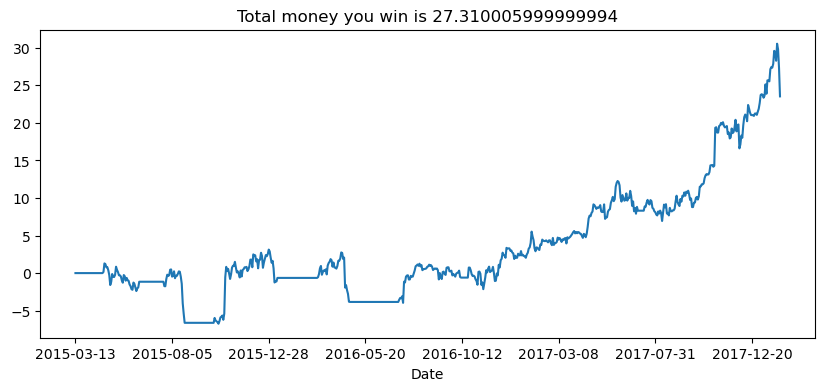

In [59]:
#whether we make or lose money
ms['Wealth'] = ms.Dailyprofit.cumsum()

# Make a graph to show profit over the period
plt.figure(figsize = (10,4))
ms.Wealth.plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2],'Wealth']))
plt.show()